In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Assumptions / Observations after acquiring domain knowledge-

#Assuming value of 6-8 as good quality

#1. Higher fixed acidity above 7 gives the good quality of wine
#2. Volatile acidity lesser than 0.5 gives the good quality
#3. Citric acid value less than 0.5 gives the good quality
#4. Residual sugar above 1.8 gives the good quality
#5. As density increases quality of wine decreases
#6. ph value in range 3.2 - 3.4 gives good quality
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine
#8. Sulphates increases as Total sulpfur increases
#9. Alcohol content between 9-10.5 gives good quality of wine
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content
#11. Less chlorides give good quality of wine
#12. As chlorides increases density increases, hence quality decreases
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality



In [3]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
291,11.0,0.200,0.48,2.0,0.343,6.0,18.0,0.99790,3.30,0.71,10.500000,5
584,11.8,0.330,0.49,3.4,0.093,54.0,80.0,1.00020,3.30,0.76,10.700000,7
190,8.2,0.500,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.400000,5
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6
153,7.5,0.600,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.100000,5
1503,6.2,0.440,0.39,2.5,0.077,6.0,14.0,0.99555,3.51,0.69,11.000000,6
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.000000,8
1226,7.5,0.580,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.200000,5
530,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.300000,6
1069,8.0,0.620,0.35,2.8,0.086,28.0,52.0,0.99700,3.31,0.62,10.800000,5


In [7]:
len(df[(df["fixed acidity"] >= 7) & (df["quality"] > 4)])/len(df)*100
# 78% of data set with fixed acidity greater than 6, gives quality > 4

77.79862414008755

In [8]:
len(df[(df["fixed acidity"] >= 7) & (df["quality"] > 5)])/len(df)*100
# 43% of data set with fixed acidity greater than or equal to 7, gives good quality

42.71419637273296

In [9]:
len(df[(df["fixed acidity"] < 7) & (df["quality"] > 5)])/len(df)*100
# 11% of data set with fixed acidity lesser than 7, gives good quality
#The above 2 codes validates 1st point of observation
#1. Higher fixed acidity above 7 gives the good quality of wine

10.756722951844903

In [10]:
len(df[(df["volatile acidity"] < 0.5) & (df["quality"] > 5)])/len(df)*100
# 31% of data set with volatile acidity lesser than 0.5, gives good quality

30.268918073796126

In [11]:
len(df[(df["volatile acidity"] >= 0.5) & (df["quality"] > 5)])/len(df)*100
# 24% of data set with volatile acidity greater than or equal to 0.5, gives good quality
#The above 2 codes validates 2nd point of observation
#2. Volatile acidity lesser than 0.5 gives the good quality

23.20200125078174

In [12]:
len(df[(df["citric acid"] < 0.5) & (df["quality"] > 5)])/len(df)*100
# 45% of data set with citric acid lesser than 0.5, gives good quality

44.777986241400875

In [13]:
len(df[(df["citric acid"] >= 0.5) & (df["quality"] > 5)])/len(df)*100
# 9% of data set with citric acid greatre than or equal to 0.5, gives good quality
#The above 2 codes validates 3rd point of observation
#3. Citric acid value less than 0.5 gives the good quality

8.692933083176985

In [14]:
len(df[(df["residual sugar"] > 1.8) & (df["quality"] > 5)])/len(df)*100
# 43% of data set with residual sugar greater than 1.8, gives good quality

42.40150093808631

In [15]:
len(df[(df["residual sugar"] <= 1.8) & (df["quality"] > 5)])/len(df)*100
# 11% of data set with residual sugar lesser than or equal to 1.8, gives good quality
#The above 2 queries validates 4th point of observation
#4. Residual sugar above 1.8 gives the good quality

11.069418386491558

In [16]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
df1 = df[df["quality"] > 5]
df1
#855 data sets out of 1599 rows have quality greater than 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [18]:
df1["density"].describe()
#Good quality wine has a density range of 0.990070 to 1.003690
#Good quality wine has IQR of 0.0025 with mean value 0.996467

count    855.000000
mean       0.996467
std        0.002067
min        0.990070
25%        0.995185
50%        0.996400
75%        0.997685
max        1.003690
Name: density, dtype: float64

In [19]:
df2 = df[df["quality"] <= 5]
df2
#744 data sets out of 1599 rows have quality lesser than or equal to 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [20]:
df2["density"].describe()
#Not Good quality wine has IQR of 0.00178 with mean value as 0.997068
#This means density has weakly negative correlation with quality
#The above 4 codes validates observation no. 5
#5. As density increases quality of wine decreases

count    744.000000
mean       0.997068
std        0.001598
min        0.992560
25%        0.996120
50%        0.996935
75%        0.997900
max        1.003150
Name: density, dtype: float64

In [21]:
df.pH.unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [22]:
len(df[(df["pH"] >= 3.2) & (df["pH"] <= 3.4) & (df["quality"] > 5)])/len(df)*100
# 30% of data set with pH between 3.2 and 3.4, gives good quality

29.580988117573483

In [23]:
len(df[(df["pH"] < 3.2) & (df["quality"] > 5)])/len(df)*100
# 11% of data set with pH less than 3.2, gives good quality

11.25703564727955

In [24]:
len(df[(df["pH"] > 3.4) & (df["quality"] > 5)])/len(df)*100
# 13% of data set with pH greater than 3.4, gives good quality
#The above 3 codes validates 6th observation
#6. ph value in range 3.2 - 3.4 gives good quality

12.632895559724828

In [25]:
len(df[(df["sulphates"] >= 0.47) & (df["sulphates"] <= 0.75) & (df["quality"] > 5)])/len(df)*100
# 36% of data set with sulphates between 0.47 and 0.75, gives good quality
#This validates 7th observation
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

36.898061288305186

In [26]:
df.sulphates.describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [27]:
df["total sulfur dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [28]:
df.sulphates.unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

In [29]:
len(df[(df["alcohol"] >= 9) & (df["alcohol"] <= 10.5) & (df["quality"] > 5)])/len(df)*100
# 23% of data set with alcohol between 9 and 10.5, gives good quality

22.76422764227642

In [30]:
len(df[(df["alcohol"] >= 9) & (df["quality"] > 5)])/len(df)*100
# 54% of data set with alcohol above 9, gives good quality

53.283302063789876

In [31]:
len(df[(df["alcohol"] >= 10.5) & (df["quality"] > 5)])/len(df)*100
# 33% of data set with alcohol above 10.5, gives good quality
#The above 2 codes contradicts range in observation no. 9 as 54% dataset with alcohol content greater than 9 gives good quality
#9. Alcohol content between 9-10.5 gives good quality of wine

32.70794246404002

In [32]:
df.chlorides.describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [33]:
len(df[(df["chlorides"] <= df["chlorides"].mean()) & (df["quality"] > 5)])/len(df)*100
#40% of dataset having chlorides lesser than its mean value shows good quality
#This validates observation no. 11
#11. Less chlorides give good quality of wine

40.08755472170106

In [34]:
df.isnull().sum()
#Dataset has no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

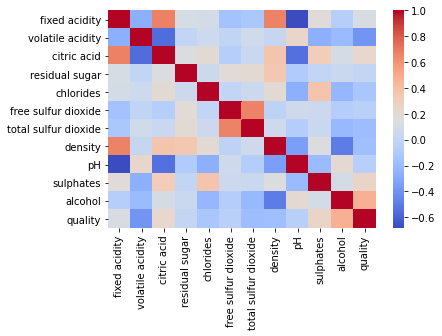

In [36]:
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')
#Strong positive correlations - 
    #citric acid and fixed acidity
    #density and fixed acidity
    #alcohol content and quality
#Moderate positive correlations - 
    #residual sugar and density
    #sulphates and chlorides
    #sulphates and citric acid
#Strong negative correlation -
    #fixed acidity and pH
    #citric acidity and pH
    #volatile acidity and citric acid
    #density and alcohol
#Moderate negatice correlation - 
    #fixed acidity and volatile acidity
    #sulphates and volatile acidity
    #Quality and volatile acidity
    #pH and density
    #Total sulfur dioxide and alcohol
    #Total sulfur dioxide and quality
    #Density and quality
    #Alcohol and chlorides

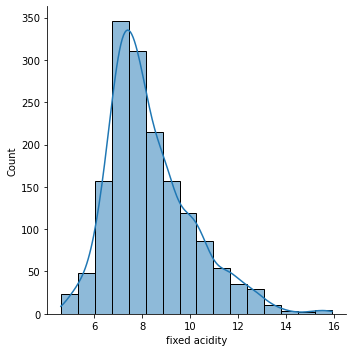

In [37]:
sns.displot(df["fixed acidity"], bins = 16, kde = True)
#Fixed acidity of 7 to 7.5 has higher counts 

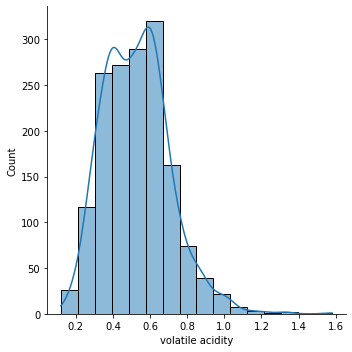

In [39]:
sns.displot(df["volatile acidity"], bins = 16, kde = True)
#Volatile acidity of 0.58 to 0.68 has higher counts and probability density function has has two different peaks at 0.4 and 0.58

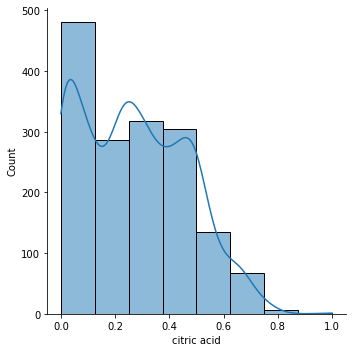

In [40]:
sns.displot(df["citric acid"], bins = 8, kde = True)
#citric acid between 0 to 0.12 has higher counts 

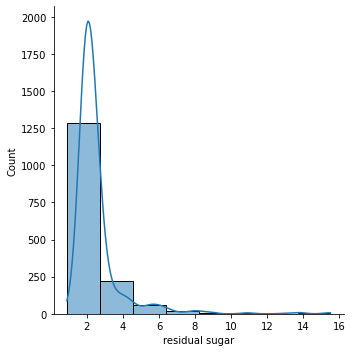

In [41]:
sns.displot(df["residual sugar"], bins = 8, kde = True)
#Residual Sugar of 2 has higher counts 

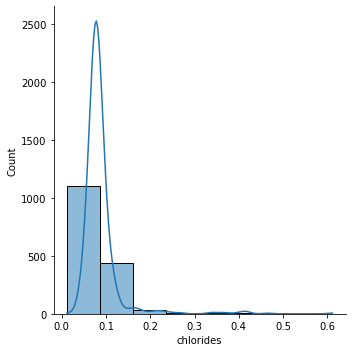

In [42]:
sns.displot(df["chlorides"], bins = 8, kde = True)
#Chlorides betwen 0.01 to 0.09 has higher counts 

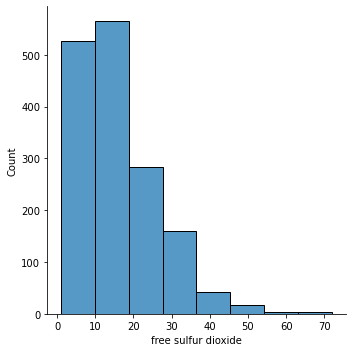

In [43]:
sns.displot(df["free sulfur dioxide"], bins = 8, kde = False)
#Free sulfur dioxide between 10 to 20 has higher counts 

C:\Users\003593\Anaconda3\Anacon3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

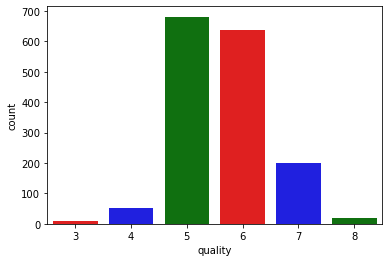

In [44]:
sns.countplot(df["quality"], palette = ["red", "blue", "green"])
#Quality 5 has higher number of counts

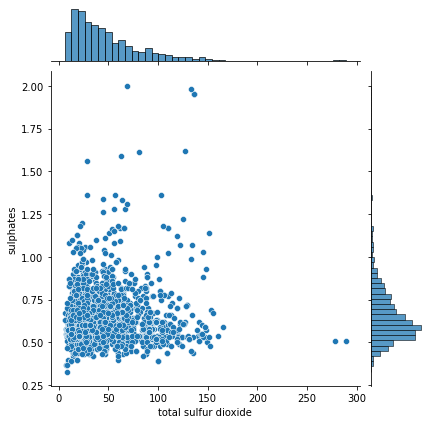

In [45]:
sns.jointplot(x = df["total sulfur dioxide"], y = df["sulphates"])
#Sulphates betwwen 0.50 and 1 are mostly present in total sulfur dioxide between 10-120
#Count of total sulfur dioxide equal to 10 and sulphates equal to 0.6 are highest
#As total sulfur dioxide increases concentration/density of sulphates decreases. This contradicts observation No. 8 
#8. Sulphates increases as Total sulpfur increases

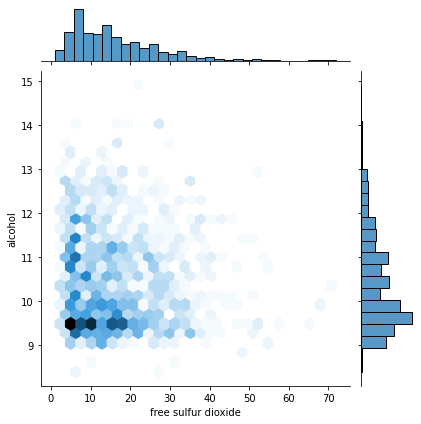

In [46]:
sns.jointplot(x = df["free sulfur dioxide"], y = df["alcohol"], kind = "hex")
#free sulfur dioxide between 5 to 20 mostly concentrated in alcohol ranging between 9 to 10
#Contradicts observation 10
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content
#free sulfur dioxide of 30 and alcohol of 9.5 have highest counts

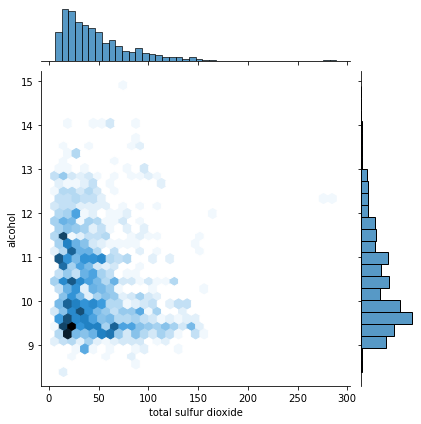

In [47]:
sns.jointplot(x = df["total sulfur dioxide"], y = df["alcohol"], kind = "hex")
#Total sulfur dioxide between 10 to 50 is mostly concentrated in alcohol ranging between 9 to 12
#Contradicts observation 10
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content
#Total sulfur dioxide of 30 and alcohol of 9.5 have highest counts

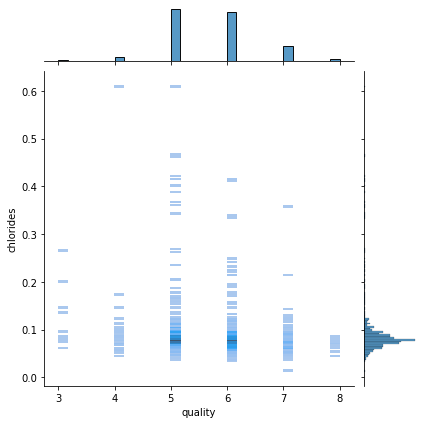

In [48]:
sns.jointplot(x = df["quality"], y = df["chlorides"], kind = "hist")
#This validates observation 11
#11. Less chlorides give good quality of wine
#Count of chlorides = 0.1 and quality of 5 are the highest

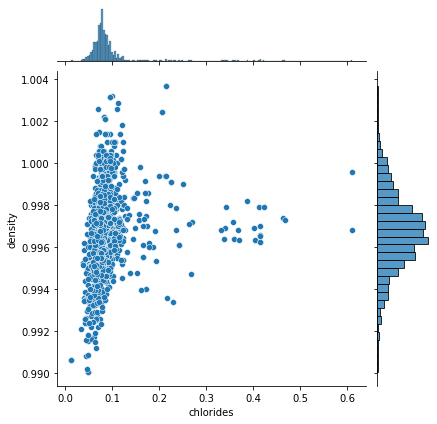

In [49]:
sns.jointplot(x = df["chlorides"], y = df["density"])
#Density highest within chlorides concentration of 0.03 to 0.1
#This contradicts observation No. 12 
#12. As chlorides increases density increases, hence quality decreases

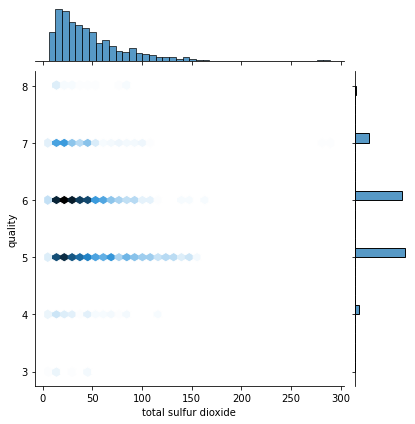

In [50]:
sns.jointplot(x = df["total sulfur dioxide"], y = df["quality"], kind = "hex")
#This validates observation 13 as good quality wine has lower total sulfur dioxide 
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

In [56]:
df4 = df.sample(20)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

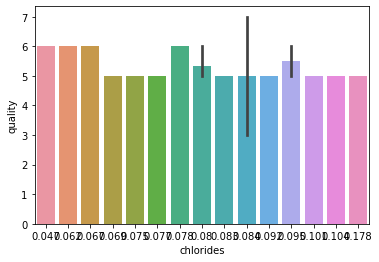

In [57]:
sns.barplot(x = df4["chlorides"], y = df4["quality"])
#Lesser chlorides good quality in a sample of 20 dataset, validates observation 11
#11. Less chlorides give good quality of wine

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

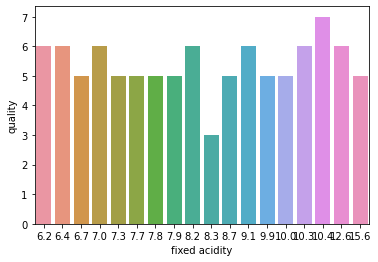

In [58]:
sns.barplot(x = df4["fixed acidity"], y = df4["quality"])
#As fixed acidity increases, quality increases for this sample, validates observation 1
#1. Higher fixed acidity above 7 gives the good quality of wine

<AxesSubplot:xlabel='pH', ylabel='quality'>

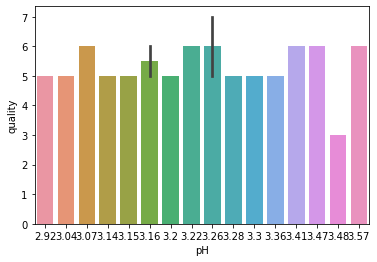

In [59]:
sns.barplot(x = df4["pH"], y = df4["quality"])

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

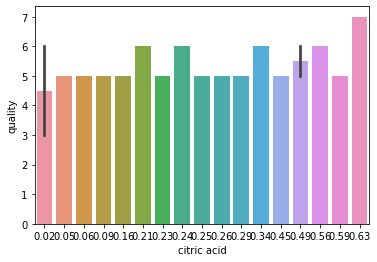

In [60]:
sns.barplot(x = df4["citric acid"], y = df4["quality"])
#This is not a good sample to comment about citric acid as observation 3 is proved using code

<AxesSubplot:ylabel='total sulfur dioxide'>

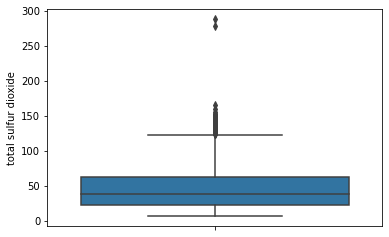

In [64]:
sns.boxplot(y = df["total sulfur dioxide"])
#25 percentile - 22
#50 percentile - 38
#75 percentie - 62
# Values above 130 are outliers
#IQR - 40, majority value lies between 22 and 62

In [66]:
df["total sulfur dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

<AxesSubplot:ylabel='fixed acidity'>

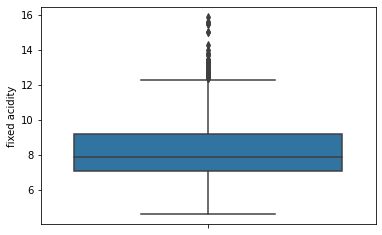

In [67]:
sns.boxplot(y = df["fixed acidity"])
#25 percentile - 7
#50 percentile - 8
#75 percentie - 9
# Values above 12.2 are outliers
#IQR - 2

<AxesSubplot:ylabel='volatile acidity'>

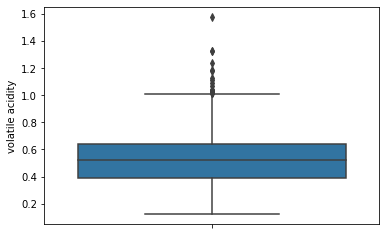

In [68]:
sns.boxplot(y = df["volatile acidity"])
#25 percentile - 0.4
#50 percentile - 0.55
#75 percentie - 0.62
# Values above 1.02 are outliers
#IQR - 0.22

<AxesSubplot:ylabel='citric acid'>

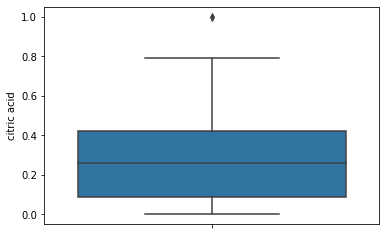

In [69]:
sns.boxplot(y = df["citric acid"])
#25 percentile - 0.1
#50 percentile - 0.28
#75 percentie - 0.41
# Values above 0.8 are outliers
#IQR - 0.31

<AxesSubplot:ylabel='residual sugar'>

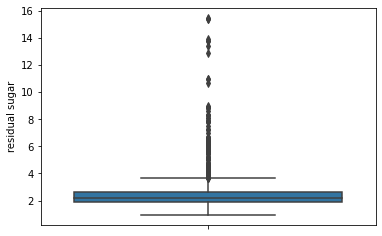

In [72]:
sns.boxplot(y = df["residual sugar"])
#25 percentile - 2
#50 percentile - 2.2
#75 percentie - 2.8
# Values above 3.9 are outliers
#IQR - 0.8

<AxesSubplot:ylabel='chlorides'>

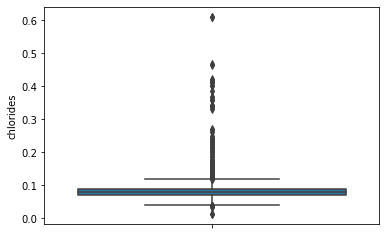

In [73]:
sns.boxplot(y = df["chlorides"])
# Values above 0.125 are outliers

<AxesSubplot:ylabel='free sulfur dioxide'>

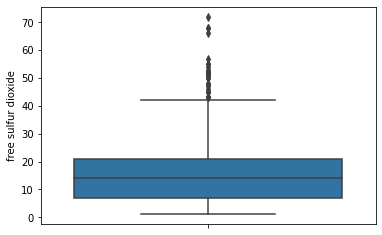

In [74]:
sns.boxplot(y = df["free sulfur dioxide"])
# Values above 22 are outliers, Positively skewed

<AxesSubplot:ylabel='density'>

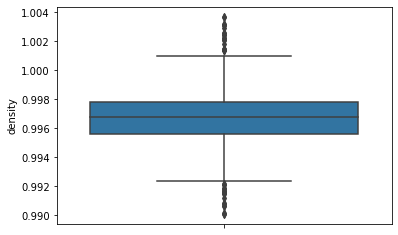

In [77]:
sns.boxplot(y = df["density"])
# Values above 1.0001 are outliers

<AxesSubplot:ylabel='pH'>

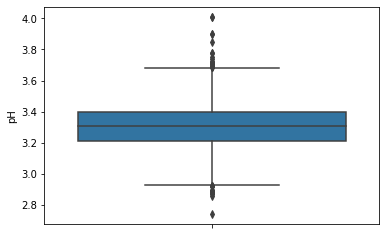

In [78]:
sns.boxplot(y = df["pH"])
# Values above 3.7 are outliers

<AxesSubplot:ylabel='sulphates'>

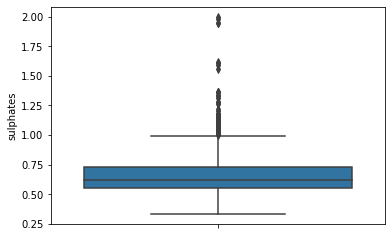

In [79]:
sns.boxplot(y = df["sulphates"])
# Values above 1.00 are outliers

<AxesSubplot:ylabel='alcohol'>

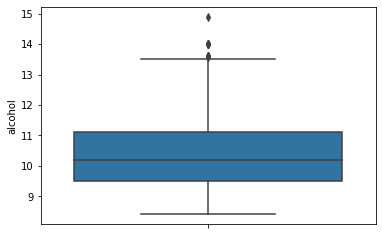

In [80]:
sns.boxplot(y = df["alcohol"])
# Values above 13.5 are outliers

<AxesSubplot:ylabel='quality'>

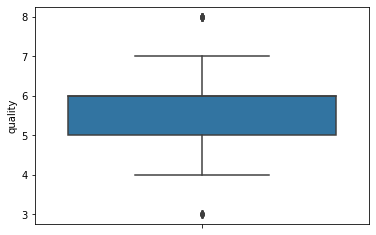

In [81]:
sns.boxplot(y = df["quality"])
# Values above 7 are outliers
#2 outliers 8 and 3
#Normally distributed between 4 to 7
#75 percentile - 6
#25 percentile - 5

<AxesSubplot:ylabel='quality'>

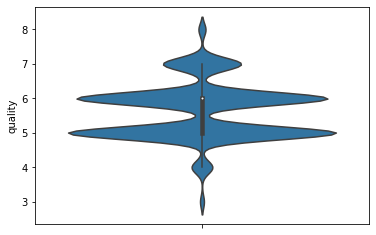

In [83]:
sns.violinplot(y = df["quality"])
#Quality 5 counts are highest followed by Quality 6

<AxesSubplot:ylabel='alcohol'>

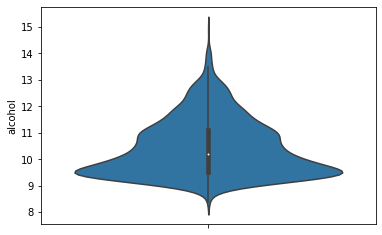

In [84]:
sns.violinplot(y = df["alcohol"])
#Alcohol value 9.5 counts are highest

<AxesSubplot:ylabel='sulphates'>

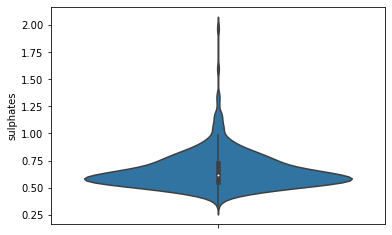

In [85]:
sns.violinplot(y = df["sulphates"])
#Sulphates value of 0.55 has highest counts

<AxesSubplot:ylabel='pH'>

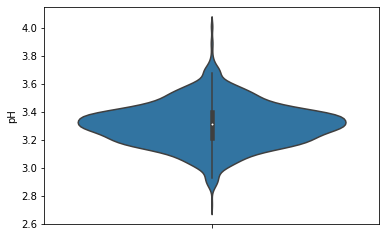

In [86]:
sns.violinplot(y = df["pH"])
#pH of 3.35 counts are the highest

<AxesSubplot:ylabel='density'>

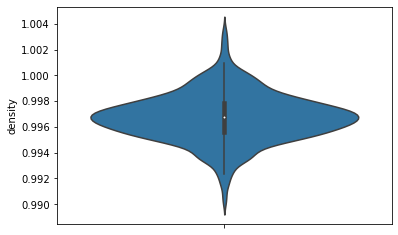

In [87]:
sns.violinplot(y = df["density"])
#Density value of 0.997 are the highest

<AxesSubplot:ylabel='total sulfur dioxide'>

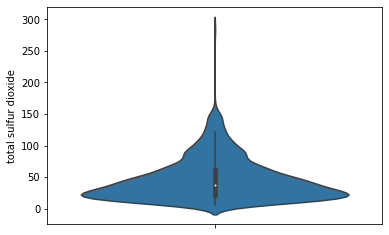

In [88]:
sns.violinplot(y = df["total sulfur dioxide"])
#Total Sulfur dioxide of value 25 has highest distribution

<AxesSubplot:ylabel='free sulfur dioxide'>

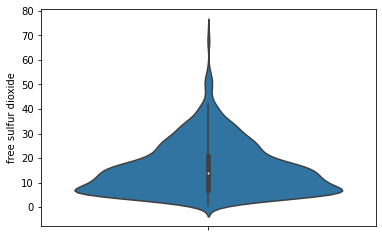

In [89]:
sns.violinplot(y = df["free sulfur dioxide"])
#free sulfur dioxide around 9 has highest counts

<AxesSubplot:ylabel='chlorides'>

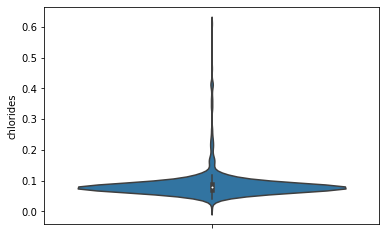

In [90]:
sns.violinplot(y = df["chlorides"])
#0.085 value of chlorides have highest counts

<AxesSubplot:ylabel='residual sugar'>

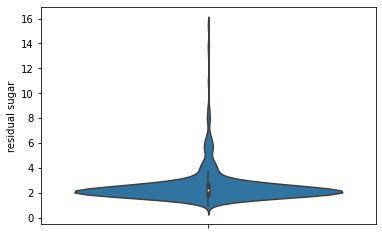

In [91]:
sns.violinplot(y = df["residual sugar"])
#Residual sugar with value 2 has highest counts

<AxesSubplot:ylabel='citric acid'>

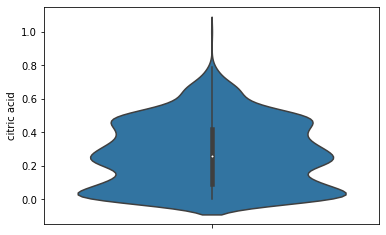

In [92]:
sns.violinplot(y = df["citric acid"])
#Citric acid value of 0.01 has highest counts followed by 0.25 and 0.5

<AxesSubplot:ylabel='volatile acidity'>

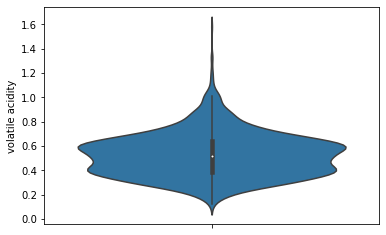

In [93]:
sns.violinplot(y = df["volatile acidity"])
#volatile acidity value of 0.6 has highest counts followed by 0.4

<AxesSubplot:ylabel='fixed acidity'>

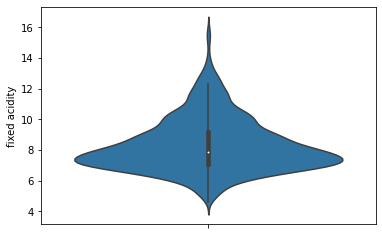

In [94]:
sns.violinplot(y = df["fixed acidity"])
#value of 7.5 has highest counts

<AxesSubplot:xlabel='quality', ylabel='density'>

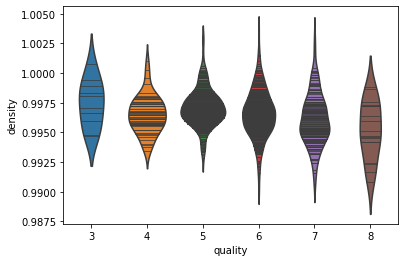

In [102]:
sns.violinplot(y = df["density"], x = df["quality"], inner = "stick")
#various distributions of sulphates are obtained for different quality
#Good quality wine have comparitively lesser density, validates observation 5
#5. As density increases quality of wine decreases

<AxesSubplot:xlabel='quality', ylabel='pH'>

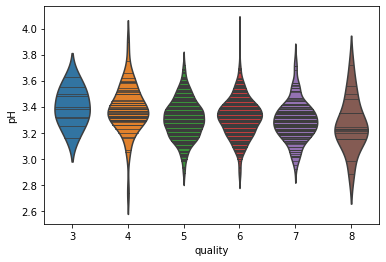

In [103]:
sns.violinplot(y = df["pH"], x = df["quality"], inner = "stick")
#Good quality wine has slightly less ph around 3.3
#Validates Observation 6
#6. ph value in range 3.2 - 3.4 gives good quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

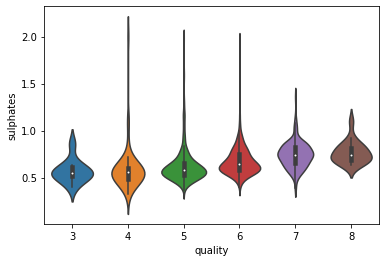

In [106]:
sns.violinplot(y = df["sulphates"], x = df["quality"], inner = "box")
#Good quality wine have sulphates in the range of 0.70 to 0.75
#This partially validates observation 7
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

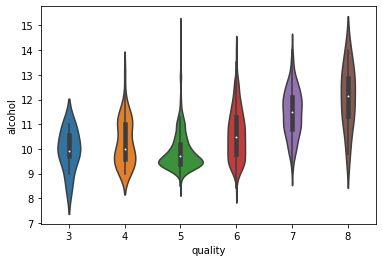

In [108]:
sns.violinplot(y = df["alcohol"], x = df["quality"], inner = "box")
#Good quality wine have alcohol content in the range of 11-12
#This contradicts observation 9
#9. Alcohol content between 9-10.5 gives good quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

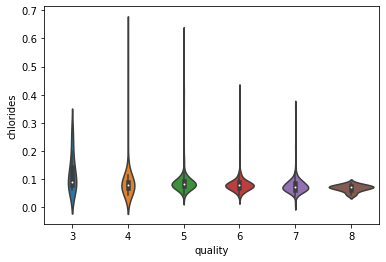

In [110]:
sns.violinplot(y = df["chlorides"], x = df["quality"], inner = "box")
#Good quality wine have chlorides approximately equal to 0.05 to 0.1
#Validates observation 11
#11. Less chlorides give good quality of wine

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

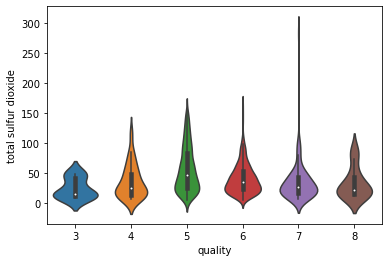

In [111]:
sns.violinplot(y = df["total sulfur dioxide"], x = df["quality"], inner = "box")
#Good quality of wine has total sulfur dioxide between 20 to 40
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

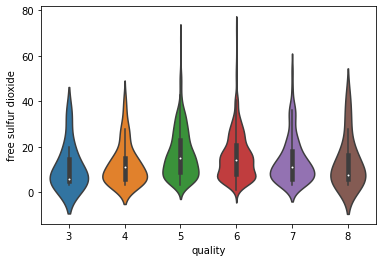

In [112]:
sns.violinplot(y = df["free sulfur dioxide"], x = df["quality"], inner = "box")
#Good quality of wine has free sulfur dioxide between 0 to 15
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

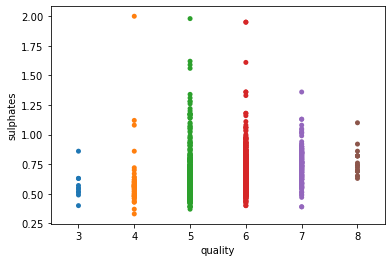

In [101]:
sns.stripplot(y = df["sulphates"], x = df["quality"], jitter = False, dodge = False)
#various distributions of sulphates are obtained for different quality
#Good quality of wine have sulphate range of 0.5 to 0.8
#partially validates observation 7
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

<AxesSubplot:xlabel='quality', ylabel='density'>

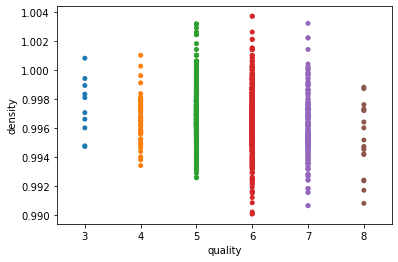

In [113]:
sns.stripplot(y = df["density"], x = df["quality"], jitter = False, dodge = False)
#various distributions of sulphates are obtained for different quality
#Good quality wine have comparitively lesser density, validates observation 5
#5. As density increases quality of wine decreases

<AxesSubplot:xlabel='quality', ylabel='density'>

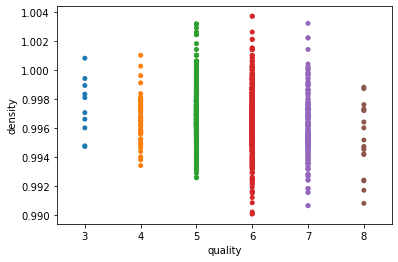

In [114]:
sns.stripplot(y = df["density"], x = df["quality"], jitter = False, dodge = False)
#various distributions of sulphates are obtained for different quality
#Good quality wine have comparitively lesser density, validates observation 5
#5. As density increases quality of wine decreases

<AxesSubplot:xlabel='quality', ylabel='pH'>

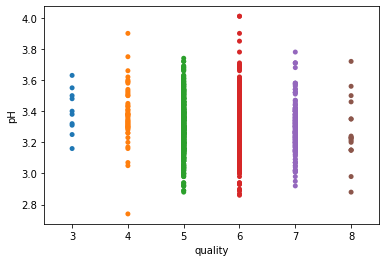

In [115]:
sns.stripplot(y = df["pH"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine has slightly less ph around 3.3
#Validates Observation 6
#6. ph value in range 3.2 - 3.4 gives good quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

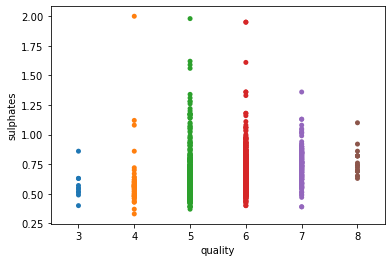

In [116]:
sns.stripplot(y = df["sulphates"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine have sulphates in the range of 0.70 to 0.75
#This partially validates observation 7
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

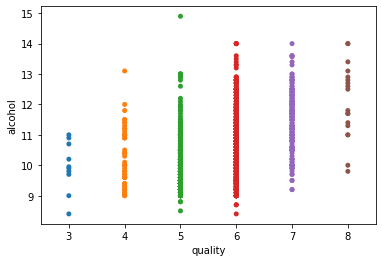

In [117]:
sns.stripplot(y = df["alcohol"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine have alcohol content in the range of 11-12
#This contradicts observation 9
#9. Alcohol content between 9-10.5 gives good quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

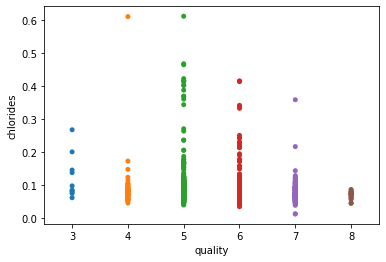

In [118]:
sns.stripplot(y = df["chlorides"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine have chlorides approximately equal to 0.05 to 0.1
#Validates observation 11
#11. Less chlorides give good quality of wine

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

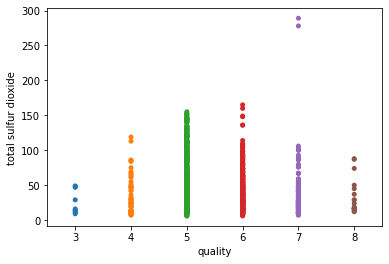

In [119]:
sns.stripplot(y = df["total sulfur dioxide"], x = df["quality"], jitter = False, dodge = False)
#Good quality of wine has total sulfur dioxide between 20 to 40
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

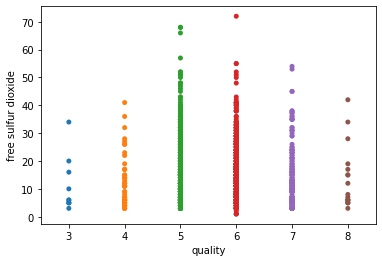

In [120]:
sns.stripplot(y = df["free sulfur dioxide"], x = df["quality"], jitter = False, dodge = False)
#Good quality of wine has free sulfur dioxide between 0 to 15
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

In [ ]:
#Conclusions

#Assuming value of 6-8 as good quality

#1. Higher fixed acidity above 7 gives the good quality of wine - True
#2. Volatile acidity lesser than 0.5 gives the good quality - True
#3. Citric acid value less than 0.5 gives the good quality - True
#4. Residual sugar above 1.8 gives the good quality - True
#5. As density increases quality of wine decreases - True
#6. ph value in range 3.2 - 3.4 gives good quality - True
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine - Partially True
#8. Sulphates increases as Total sulpfur increases - False
#9. Alcohol content between 9-10.5 gives good quality of wine - False
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content - False
#11. Less chlorides give good quality of wine - True
#12. As chlorides increases density increases, hence quality decreases - False
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality - True

#Thanks Harshil Sir!